In [2]:
%load_ext autoreload
%autoreload 2

In [3]:
import glob
import os
import pandas as pd
from enduse_comparison_functions import combine_enduse_from_csv, create_two_way_correspondences, create_enduse_by_country, check_enduse_integrity
from enduse_comparison_plots import country_all_enduses_panel

In [4]:
gloria_csv_path = os.path.join(os.getcwd(), "input_data", "GLORIA_basic_WIO_MF_EUT_end_use_shares_4_crosschecking")
csv_glob = os.path.join(gloria_csv_path, "*.csv")
csv_files = glob.glob(csv_glob)

In [5]:
all_enduses = combine_enduse_from_csv(csv_files)

In [6]:
gloria_exiobase_correspondence = pd.read_excel(os.path.join("input_data", "2023_GLORIA_EXIOBASE_corresp_aggr.xlsx"), sheet_name="values")

In [7]:
correspondences = gloria_exiobase_correspondence.to_dict("records")

In [8]:
correspondence_gloria_to_exio, correspondence_exio_to_gloria, equal_names = create_two_way_correspondences(correspondences)

In [9]:
country_material_enduse = create_enduse_by_country(all_enduses, gloria_exiobase_correspondence)

In [10]:
len(country_material_enduse.keys())

177

In [11]:
invalids = check_enduse_integrity(country_material_enduse)

Enduses below 100 in Armenia Aluminum
Enduses below 100 in Armenia Asphalt
Enduses below 100 in Armenia Bricks
Enduses below 100 in Armenia Chromium
Enduses below 100 in Armenia Concrete
Enduses below 100 in Armenia Container
Enduses below 100 in Armenia Copper
Enduses below 100 in Armenia Flat
Enduses below 100 in Armenia IronSteel
Enduses below 100 in Armenia Lead
Enduses below 100 in Armenia Manganese
Enduses below 100 in Armenia Nickel
Enduses below 100 in Armenia Paper
Enduses below 100 in Armenia Plastics
Enduses below 100 in Armenia Tin
Enduses below 100 in Armenia Wood
Enduses below 100 in Armenia Zinc
Enduses below 100 in Azerbaijan Aluminum
Enduses below 100 in Azerbaijan Asphalt
Enduses below 100 in Azerbaijan Bricks
Enduses below 100 in Azerbaijan Chromium
Enduses below 100 in Azerbaijan Concrete
Enduses below 100 in Azerbaijan Container
Enduses below 100 in Azerbaijan Copper
Enduses below 100 in Azerbaijan Flat
Enduses below 100 in Azerbaijan IronSteel
Enduses below 100 in

In [12]:
invalids

{('Armenia',
  'Aluminum'): year
 1990    92.857143
 dtype: float64,
 ('Armenia',
  'Asphalt'): year
 1990    92.857143
 dtype: float64,
 ('Armenia',
  'Bricks'): year
 1990    92.857143
 dtype: float64,
 ('Armenia',
  'Chromium'): year
 1990    92.857143
 dtype: float64,
 ('Armenia',
  'Concrete'): year
 1990    92.857143
 dtype: float64,
 ('Armenia',
  'Container'): year
 1990    92.857143
 dtype: float64,
 ('Armenia',
  'Copper'): year
 1990    92.857143
 dtype: float64,
 ('Armenia',
  'Flat'): year
 1990    92.857143
 dtype: float64,
 ('Armenia',
  'IronSteel'): year
 1990    92.857143
 dtype: float64,
 ('Armenia',
  'Lead'): year
 1990    92.857143
 dtype: float64,
 ('Armenia',
  'Manganese'): year
 1990    92.857143
 dtype: float64,
 ('Armenia',
  'Nickel'): year
 1990    92.857143
 dtype: float64,
 ('Armenia',
  'Paper'): year
 1990    92.857143
 dtype: float64,
 ('Armenia',
  'Plastics'): year
 1990    92.857143
 dtype: float64,
 ('Armenia',
  'Tin'): year
 1990    92.857143
 d

In [19]:
# export this to excel
for country, df_dict in country_material_enduse.items():
    filename = "gloria_output/GLORIA_" + country + "_enduses.xlsx"
    with pd.ExcelWriter(filename) as writer:
        for material, df in df_dict.items():
            df.to_excel(writer, sheet_name=material, index=True)


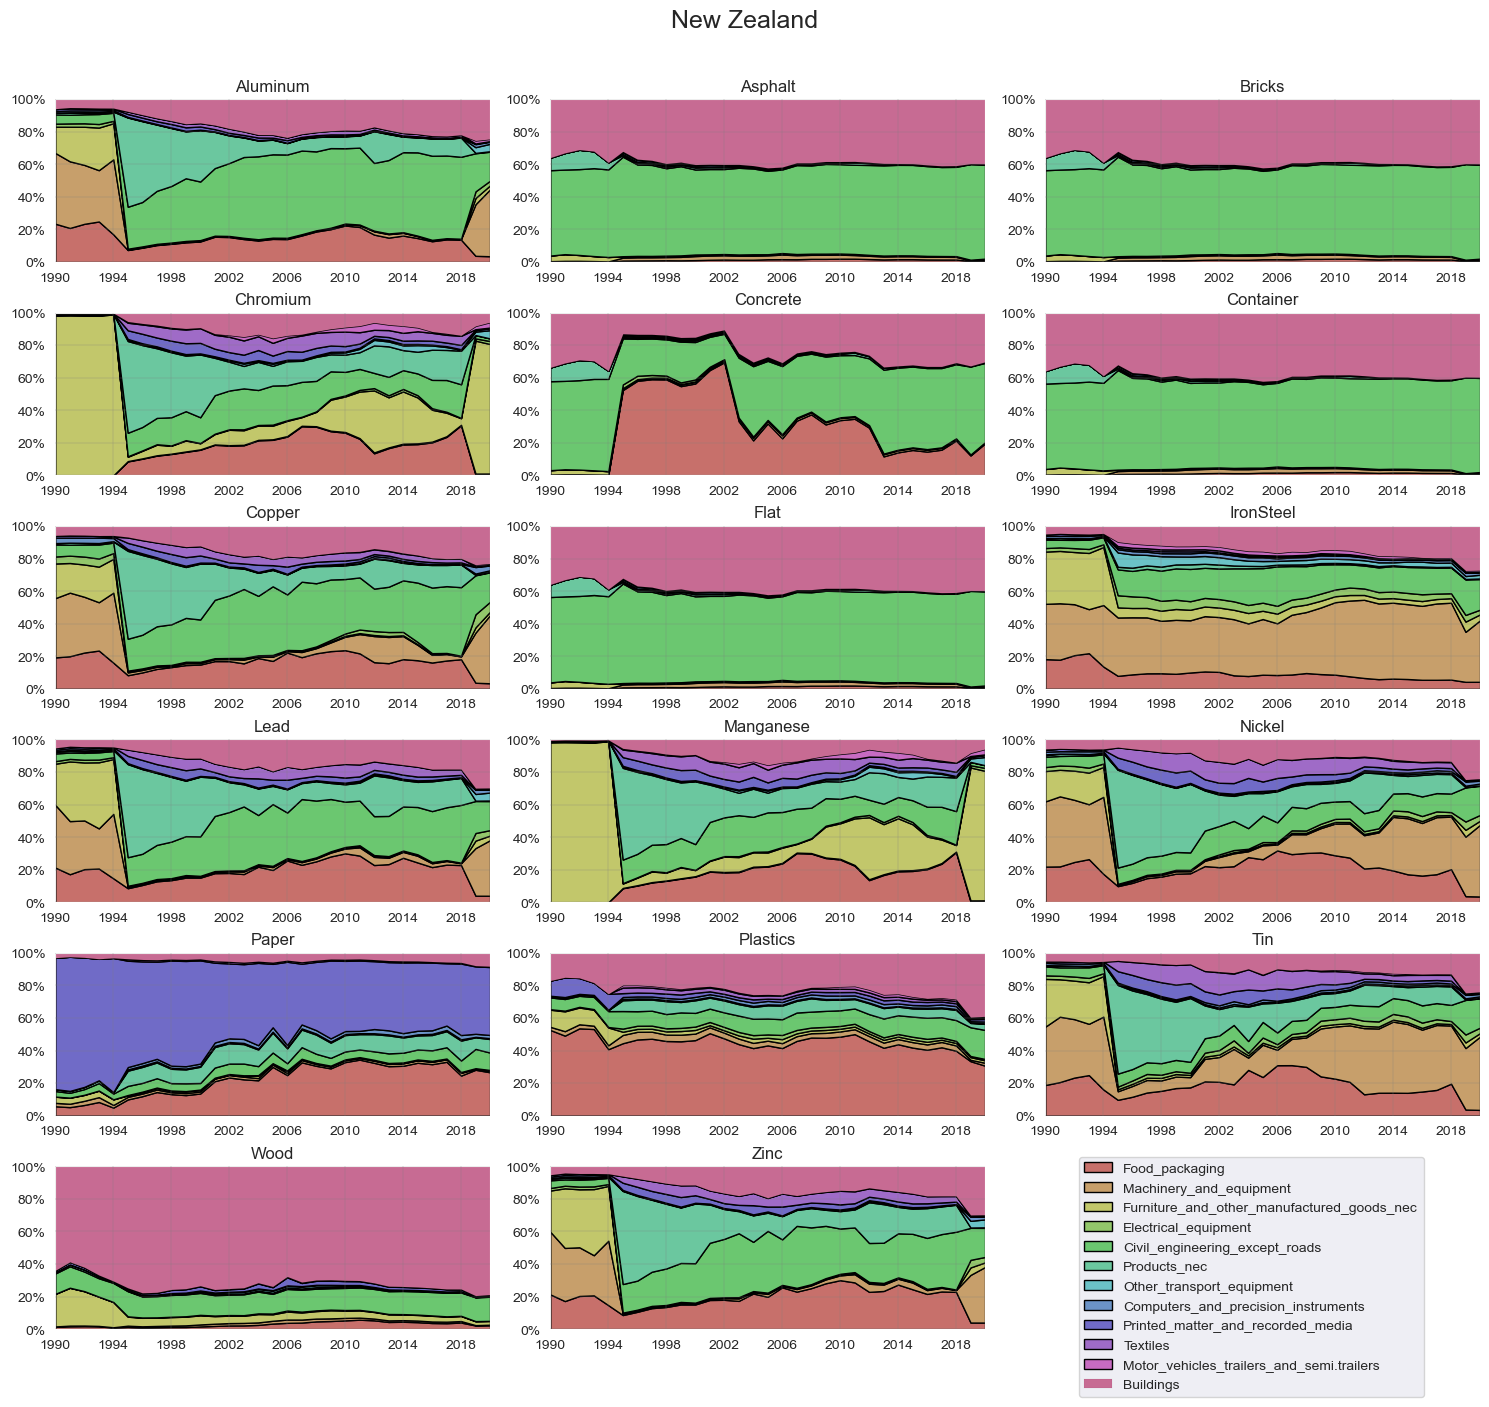

In [120]:
country_all_enduses_panel(country_material_enduse["New Zealand"], "New Zealand", False)

KeyboardInterrupt: 

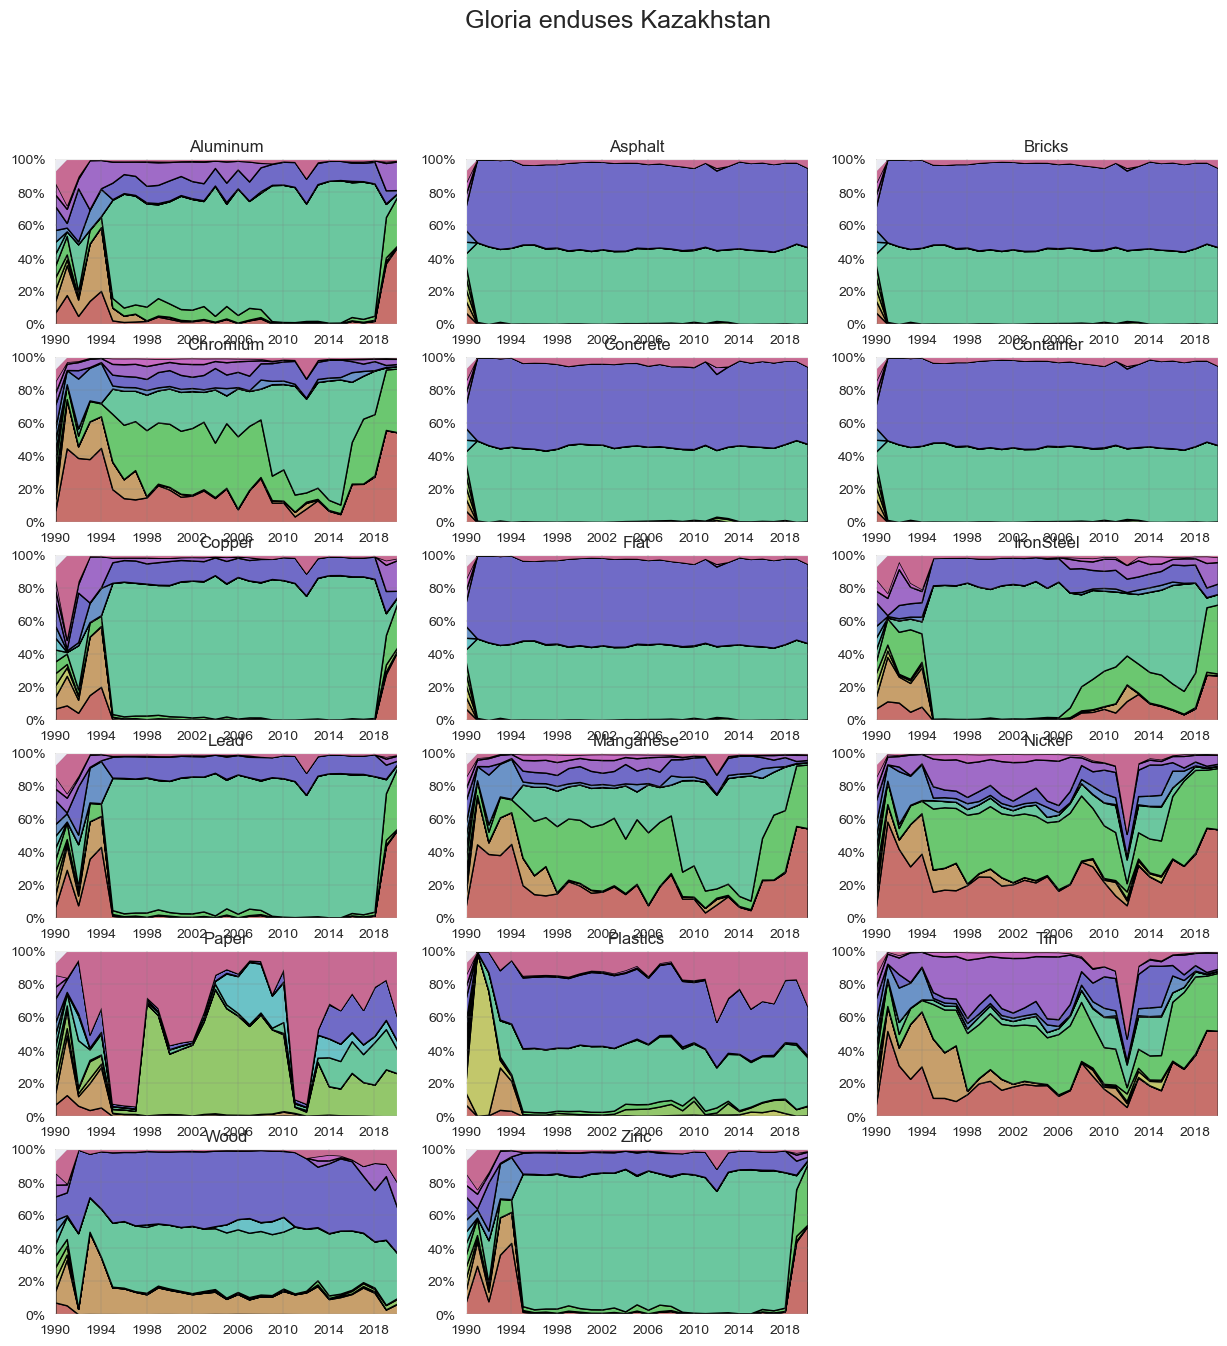

In [13]:
for country, df_dict in country_material_enduse.items():
    plot_title = "Gloria enduses " + country
    country_all_enduses_panel(df_dict, plot_title, True)

In [22]:
from enduse_comparison_functions import transform_gloria_dict_to_df
comparison_path = "GLORIA_EXIOBASE_SHIPMENT_VERGLEICH"
country_correspondences = pd.read_excel(os.path.join(comparison_path, "MISO2_country_region_correspondence.xlsx"), sheet_name="values")

gloria_df = transform_gloria_dict_to_df(country_material_enduse, country_correspondences)

In [23]:
gloria_df = gloria_df.droplevel(1)

In [24]:
gloria_df.head()

year                                                                          1990  \
MISO2_country Enduse                                     MISO2_Material              
Afghanistan   Electrical_equipment                       Aluminum        13.226698   
              Furniture_and_other_manufactured_goods_nec Aluminum         7.316079   
              Textiles                                   Aluminum         0.250764   
              Products_nec                               Aluminum         4.891262   
              Machinery_and_equipment                    Aluminum        34.348967   

year                                                                          1991  \
MISO2_country Enduse                                     MISO2_Material              
Afghanistan   Electrical_equipment                       Aluminum         0.597416   
              Furniture_and_other_manufactured_goods_nec Aluminum         1.208365   
              Textiles                                   Aluminum        21.326870   
              Products_nec                               Aluminum        18.538600   
              Machinery_and_equipment                    Aluminum         7.454584   

year                                                                          1992  \
MISO2_country Enduse                                     MISO2_Material              
Afghanistan   Electrical_equipment                       Aluminum         0.143708   
              Furniture_and_other_manufactured_goods_nec Aluminum         0.453167   
              Textiles                                   Aluminum        20.463954   
              Products_nec                               Aluminum        23.398364   
              Machinery_and_equipment                    Aluminum         4.059898   

year                                                                          1993  \
MISO2_country Enduse                                     MISO2_Material              
Afghanistan   Electrical_equipment                       Aluminum        11.531995   
              Furniture_and_other_manufactured_goods_nec Aluminum         5.129728   
              Textiles                                   Aluminum         0.017003   
              Products_nec                               Aluminum         0.776732   
              Machinery_and_equipment                    Aluminum        40.148759   

year                                                                          1994  \
MISO2_country Enduse                                     MISO2_Material              
Afghanistan   Electrical_equipment                       Aluminum         0.212998   
              Furniture_and_other_manufactured_goods_nec Aluminum         0.265088   
              Textiles                                   Aluminum        11.320391   
              Products_nec                               Aluminum        28.609962   
              Machinery_and_equipment                    Aluminum         6.475943   

year                                                                         1995  \
MISO2_country Enduse                                     MISO2_Material             
Afghanistan   Electrical_equipment                       Aluminum        0.062486   
              Furniture_and_other_manufactured_goods_nec Aluminum        0.096031   
              Textiles                                   Aluminum        1.172473   
              Products_nec                               Aluminum        1.621134   
              Machinery_and_equipment                    Aluminum        1.111371   

year                                                                         1996  \
MISO2_country Enduse                                     MISO2_Material             
Afghanistan   Electrical_equipment                       Aluminum        0.022333   
              Furniture_and_other_manufactured_goods_nec Aluminum        0.041672   
              Textiles                           

In [26]:
# from modules.EndUseShares_GraphsStatistics_functions_v1 import save_exiobase_country_results, assemble_exiobase_results
#
# main_path = os.getcwd()
# data_path_exio = os.path.join(main_path, 'output/Exiobase/')
# data_path_shipments = 'input_data/Industry_Shipments/Other_Countries/'
# years_exio = list(range(1995,2012))
# plotMaterials = ['Plastic', 'steel', 'Copper', 'alumin', 'Wood', 'glass', 'Lead, zinc and tin', 'non-ferrous metal', 'Precious metals', 'Cement, lime and plaster', 'Bricks, tiles',
#                  'Bitumen', 'Pulp', 'Sand and clay', 'Stone']
# save_regions = ['AT']
# materials, region_transl, region_dict = assemble_exiobase_results(data_path_exio, years_exio, save_regions)
# file_name = 'EXIOBASE_EndUse_Austria'
# save_exiobase_country_results(data_path_exio, file_name, materials, region_dict, save_regions)


/Users/benedikt/Documents/GitHub/Material_End_Use_Shares/modules/EndUseShares_GraphsStatistics_functions_v1.py:1216: FutureWarning: The pandas.datetime class is deprecated and will be removed from pandas in a future version. Import from datetime module instead.
  writer = pd.ExcelWriter(output_path + file_name + '_Run_{}.xlsx'.format(pd.datetime.today().strftime('%y%m%d-%H%M%S')))
